In [1]:
import numpy as np

### Generating Data

In [2]:
NoP = 1000#1000 #NumberOfParticles per set

Norm = np.random.normal(0, 1, NoP)
Normy = np.random.normal(0, 1, NoP)
t = np.random.uniform(0,1,NoP)
x = np.sqrt(t)*np.cos(4*np.sqrt(t)*np.pi)+0.05*Norm
y = np.sqrt(t)*np.sin(4*np.sqrt(t)*np.pi)+0.05*Normy
target = np.zeros((1, NoP))

Norm2 = np.random.normal(0, 1, NoP)
Norm2y = np.random.normal(0, 1, NoP)
t2 = np.random.uniform(0,1,NoP)
x2 = np.sqrt(t2)*np.cos(4*np.sqrt(t2)*np.pi+np.pi)+0.05*Norm2
y2 = np.sqrt(t2)*np.sin(4*np.sqrt(t2)*np.pi+np.pi)+0.05*Norm2y
target2 = np.ones((1, NoP))


DataSet = np.zeros((3,NoP*2))
Data_X = np.hstack((x, x2))
Data_Y = np.hstack((y, y2))
Data = np.vstack((Data_X,Data_Y))
Target = np.hstack((target,target2))
DataSet[0:2,:] = Data
DataSet[2,:] = Target
DataSet = DataSet.T
np.random.shuffle(DataSet)
#np.save('NN_Swiss_DataSet.npy', DataSet)




In [8]:
NoP = 1000#1000 #NumberOfParticles per set
DataSet = np.load('NN_Swiss_DataSet.npy')
Split = round((NoP*2)*0.05)
TrainData = DataSet[0:Split,:]
TestData = DataSet[Split:,:]


class CustomDataset:
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = self.data[idx][:2]  # Extract input features
        target = self.data[idx][2]  # Extract target
        return features, target

TrainDataSet = CustomDataset(TrainData)
TestDataSet = CustomDataset(TestData)

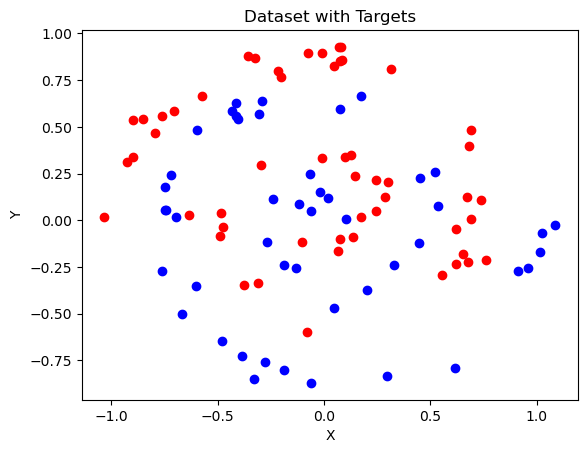

In [9]:
import matplotlib.pyplot as plt

# Plot the dataset
for features, target in TrainDataSet:
    if target == 0:
        plt.scatter(features[0], features[1], c='b', label='Class 0')
    else:
        plt.scatter(features[0], features[1], c='r', label='Class 1')
        
        

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Targets')
#plt.legend()
plt.show()

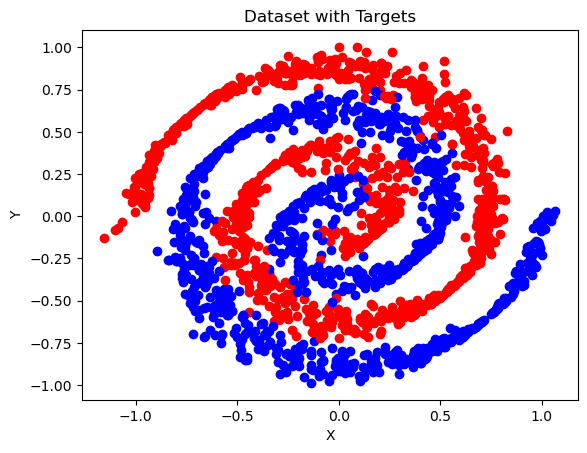

In [13]:
# Plot the dataset
for features, target in TestDataSet:
    if target == 0:
        plt.scatter(features[0], features[1], c='b', label='Class 0')
    else:
        plt.scatter(features[0], features[1], c='r', label='Class 1')
        
        

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset with Targets')
#plt.legend()
plt.show()

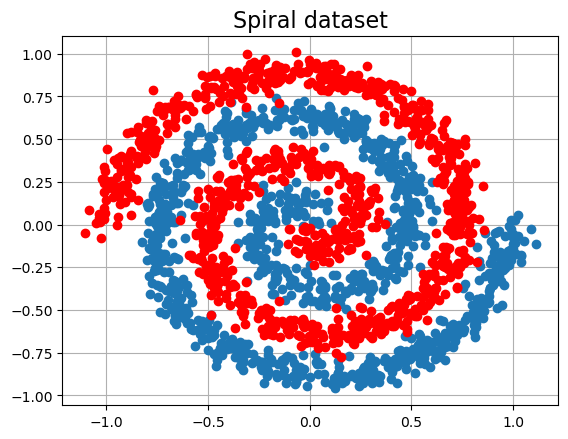

In [7]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x, y,'o')  # Add label to each plot
plt.plot(x2, y2,'o',color="red")  # Add label to each plot

plt.title(r'Spiral dataset',fontsize=16)
plt.grid(True)
plt.show()

## First order

### Creating Neural Network

In [10]:
class network:
    def __init__(self, input_size,hidden_size,output_size,N):
        
        #h_shared_values = np.random.uniform(-1,1,(1,input_size,hidden_size))
        h_shared_values = np.random.normal(scale = np.sqrt(2/input_size),size=(1,input_size,hidden_size))
        
        
        h_shared_vector = np.repeat(h_shared_values, N, axis=0)

        h_pertubation = np.random.normal(scale = 1,size = (N,1))*4 #? Don't know 
        
        h_pertubation_one_array = np.ones((N,input_size,hidden_size))
        h_pertubation_array = h_pertubation_one_array*h_pertubation[:,np.newaxis]
        h = h_shared_vector + h_pertubation_array 
        h = np.random.normal(scale = np.sqrt(2/input_size),size=(N,input_size,hidden_size)) #Test with new initialization
        
        #New stuff below
        
        h_bias = np.ones((N,1,hidden_size))*0.01
        self.h_bias = h_bias
        self.h2_bias = h_bias
        
        #New stuff above
        

        #o_shared_values = np.random.uniform(-5,5,(1,hidden_size,output_size))
        o_shared_values = np.random.uniform(-1/np.sqrt(hidden_size),1/np.sqrt(hidden_size),(1,hidden_size,output_size))
        #o_shared_values = np.random.normal(scale = np.sqrt(2/hidden_size),size=(1,hidden_size,output_size))
        o_shared_vector = np.repeat(o_shared_values, N, axis=0)

        o_pertubation = np.random.normal(scale = 1,size=(N,1))*4 #? Don't know the size here
        o_pertubation_one_array = np.ones((N,hidden_size,output_size))
        o_pertubation_array = o_pertubation_one_array*o_pertubation[:,np.newaxis]
        o = o_shared_vector + o_pertubation_array 
        o = np.random.uniform(-1/np.sqrt(hidden_size),1/np.sqrt(hidden_size),(N,hidden_size,output_size)) #Testing with new initialization
        #New stuff below
        
        o_bias = np.ones((N,1,1))*0.01
        self.o_bias = o_bias
        self.o2_bias = o_bias
        
        #New stuff above
        
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.hidden2 = h
        self.output2 = o
        
        self.N = N
        self.hidden = h
        self.output = o

        
    def relu(self,x):
        return np.maximum(0, x)
    
    def sigmoid(self,x):
        #sig = np.exp(x)/(np.exp(x)+1)
        sig = 1/(1+np.exp(-x))
        #clamped_sig = np.clip(sig, -20, 20)
        return sig

    def forward(self,input):
        firstLayer = np.matmul(input[np.newaxis,:], self.hidden) + self.h_bias
        Relu = self.relu(firstLayer)
        SecondLayer = Relu@self.output + self.o_bias
        clamped_SecondLayer = np.clip(SecondLayer, -10, 10) 
        Sigmoid = self.sigmoid(clamped_SecondLayer)
        return Sigmoid
    
    def forward2(self,input):
        firstLayer = np.matmul(input[np.newaxis,:], self.hidden2) + self.h2_bias
        Relu = self.relu(firstLayer)
        SecondLayer = Relu@self.output2 + self.o2_bias
        clamped_SecondLayer = np.clip(SecondLayer, -10, 10)
        Sigmoid = self.sigmoid(clamped_SecondLayer)
        return Sigmoid
    
    def testing(self,h,o,h_bias,o_bias):
        self.hidden2 = h
        self.output2 = o
        self.h2_bias = h_bias
        self.o2_bias = o_bias

    def update(self,o_update,h_update,o_bias_update,h_bias_update,iteration):#,o_noise,h_noise,iteration):
        
        input_size = self.input_size
        output_size = self.output_size
        hidden_size = self.hidden_size
        N = self.N

        decay_const = 0.1#0.1
        decay_rate = 1/(1+iteration*decay_const)
        
        h_p = 0.05
        self.hidden = self.hidden - h_update*h_p + np.random.normal(scale = 1,size=(N,input_size,hidden_size))*np.sqrt(h_p)*decay_rate#*100 #Add noise 10^-5 Should probably be different sizes here?
        self.output = self.output - o_update*h_p + np.random.normal(scale = 1,size=(N,hidden_size,output_size))*np.sqrt(h_p)*decay_rate#*100
    
        self.h_bias= self.h_bias - h_bias_update*h_p + np.random.normal(scale = 1,size=(N,1,hidden_size))*np.sqrt(h_p)*decay_rate#*100 #Add noise 10^-5 Should probably be different sizes here?
        self.o_bias = self.o_bias - o_bias_update*h_p + np.random.normal(scale = 1,size=(N,1,1))*np.sqrt(h_p)*decay_rate#*100
    
original_model = network(2,500,1,50) #input_size,hidden_size,output_size,N
#model = network(2,3,1,3)



#### Loss Function

In [11]:
def LossFunction(pred,target):
    loss = -(target*np.log(pred+10**(-8))+(1-target)*np.log(1-pred+10**(-8)))
    clamped_loss = np.clip(loss, -20, 20)
    return clamped_loss

### Training Neural Network

In [12]:
import copy
model = copy.deepcopy(original_model)
n = model.N
l = len(TrainDataSet)
l2 = len(TestDataSet)
epochs = 5000

loss_graph = np.zeros((epochs,n,1,1)) 
accuracy_graph = np.zeros((epochs,n,1,1)) 
accuracy_graph2 = np.zeros((epochs,n,1,1)) 
accuracy_graph3 = np.zeros((epochs,n,1,1)) 
accuracy_graph4 = np.zeros((epochs,n,1,1)) 

loss_graph_train = np.zeros((epochs,n,1,1)) 
loss_graph_test = np.zeros((epochs,n,1,1)) 

#elapsed_time_total4 = 0
iteration = 0
for epoch in range(epochs):
    h = model.hidden
    o = model.output
    o_bias = model.o_bias
    h_bias = model.h_bias
    
    o_total_update = 0
    h_total_update = 0
    o_bias_total_update = 0
    h_bias_total_update = 0

    
    correct = 0
    correct2 = 0
    total_loss = 0
    iteration += 1
    

    #elapsed_time4 = 0
    count_var = 0
    for X,y in TrainDataSet:
        
        
    # Compute prediction error
        #start_time = time.time()
        pred = model.forward(X)
        
        
        #Loss and Accuracy for plots
        loss = LossFunction(pred, y)
        total_loss += loss
        if (y == 1):
            correct +=(pred>=0.5)*1
        else:
            correct += (pred<0.5)*1

            
        fbar = np.sum(pred)/n #Be carful regarding multiple inputs at the same time
        lossfunc2 = -(pred-y)/(pred*(pred-1)+10**(-8))
        lossfunc = np.clip(lossfunc2, -20, 20)
        const = (pred-fbar)
        

        #Change in output weights
        o_new = const*o         
        o_update_temp = np.sum(o_new,axis=0)/n
        o_update = o_update_temp*lossfunc
        o_total_update += o_update
        
        # New changes below
        o_bias_new = const*o_bias         
        o_bias_update_temp = np.sum(o_bias_new,axis=0)/n
        o_bias_update = o_bias_update_temp*lossfunc
        o_bias_total_update += o_bias_update
        # New changes above
        
        #Change in input weights
        h_new = const*h
        h_update_temp = np.sum(h_new,axis=0)/n
        h_update = h_update_temp*lossfunc
        h_total_update += h_update
        
        # New changes below
        h_bias_new = const*h_bias
        h_bias_update_temp = np.sum(h_bias_new,axis=0)/n
        h_bias_update = h_bias_update_temp*lossfunc
        h_bias_total_update += h_bias_update
        # New changes above

        #assert not np.any(np.isnan(h_total_update))
        #assert not np.any(np.isnan(o_total_update))
        #elapsed_time += end_time - start_time
        #elapsed_time2 += end_time2 - start_time2
        #elapsed_time4 += end_time4 - start_time4
    #start_time3 = time.time()
    
        count_var += 1
        if count_var == 2:
            count_var = 0
            h_total_update = h_total_update/2
            o_total_update = o_total_update/2
            h_bias_total_update =  h_bias_total_update/2
            o_bias_total_update =  o_bias_total_update/2
            model.update(o_total_update,h_total_update,o_bias_total_update,h_bias_total_update,iteration)#,o_noise_total,h_noise_total,iteration)
            o_total_update = 0
            h_total_update = 0
            o_bias_total_update = 0
            h_bias_total_update = 0
            h = model.hidden
            o = model.output
            h_bias = model.h_bias
            o_bias = model.o_bias

    
    #h_total_update = h_total_update/l
    #h_noise_total = h_noise/l
    #o_total_update = o_total_update/l
    #o_noise_total = o_noise/l
    
    #Used for plots
    total_loss = total_loss/l
    accuracy = correct/l
    accuracy2 = correct2/l2
    
    accuracy_graph[epoch,:,:,:] = accuracy
    accuracy_graph2[epoch,:,:,:] = accuracy2
    loss_graph[epoch,:,:,:] = total_loss
    
    
    #Weighted average particle
    h_a = np.sum(np.exp(-20*total_loss))
    h_b = np.sum(h*np.exp(-20*total_loss),axis=0)
    h_c=h_b/h_a
    
    h_bias_a = np.sum(np.exp(-20*total_loss))
    h_bias_b = np.sum(h_bias*np.exp(-20*total_loss),axis=0)
    h_bias_c=h_bias_b/h_bias_a

    o_a = np.sum(np.exp(-20*total_loss))
    o_b = np.sum(o*np.exp(-20*total_loss),axis=0)
    o_c=o_b/o_a
    
    o_bias_a = np.sum(np.exp(-20*total_loss))
    o_bias_b = np.sum(o_bias*np.exp(-20*total_loss),axis=0)
    o_bias_c=o_bias_b/o_bias_a

    o_c_new_axis = o_c[np.newaxis,:]
    o2 = np.repeat(o_c_new_axis, n, axis=0)

    h_c_new_axis = h_c[np.newaxis,:]
    h2 = np.repeat(h_c_new_axis, n, axis=0)
    
    h_bias_c_new_axis = h_bias_c[np.newaxis,:]
    h2_bias = np.repeat(h_bias_c_new_axis, n, axis=0)
    
    o_bias_c_new_axis = o_bias_c[np.newaxis,:]
    o2_bias = np.repeat(o_bias_c_new_axis, n, axis=0)
    
    model.testing(h2,o2,h2_bias,o2_bias)
    
    correct3 = 0
    loss_train = 0
    for X,y in TrainDataSet:
        pred = model.forward2(X)
        if (y == 1):
            correct3 +=(pred>=0.5)*1
        else:
            correct3 += (pred<0.5)*1
        loss_train += LossFunction(pred, y) 
            
    accuracy3 = correct3/l
    accuracy_graph3[epoch,:,:,:] = accuracy3
    
    loss_graph_train[epoch,:,:,:] = loss_train/l
    
    correct4 = 0       
    loss_test = 0
    for X,y in TestDataSet:
        pred = model.forward2(X)
        if (y == 1):
            correct4 +=(pred>=0.5)*1
        else:
            correct4 += (pred<0.5)*1    
        loss_test += LossFunction(pred, y)  
    accuracy4 = correct4/l2
    accuracy_graph4[epoch,:,:,:] = accuracy4
    
    loss_graph_test[epoch,:,:,:] = loss_test/l2


##### Testing performance boost

In [72]:
TrainDataSet.data
features = TrainDataSet.data[:,0:2]
labels = TrainDataSet.data[:,2]
pred = model.forward2(features)
output = pred[0,:,0]
(((output >= 0.5)*1) == labels).sum().item()
"""
predictions = (outputs >= 0.5).int()
acc += (predictions == labels).sum().item()
"""



43

In [53]:
N = 50
h = model.hidden
o = model.output

h_a = np.sum(np.exp(-20*total_loss))
h_b = np.sum(h*np.exp(-20*total_loss),axis=0)
h_c=h_b/h_a

o_a = np.sum(np.exp(-20*total_loss))
o_b = np.sum(o*np.exp(-20*total_loss),axis=0)
o_c=o_b/o_a

o_c_new_axis = o_c[np.newaxis,:]
o2 = np.repeat(o_c_new_axis, N, axis=0)

h_c_new_axis = h_c[np.newaxis,:]
h2 = np.repeat(h_c_new_axis, N, axis=0)

model.testing(h2,o2)
model.forward2()


In [21]:
a_4 = np.sum(np.exp(-20*total_loss))
b_4 = np.sum(h*np.exp(-20*total_loss),axis=0)
c_4=b_4/a_4


#### Results

In [63]:
loss.shape

(50, 500, 1)

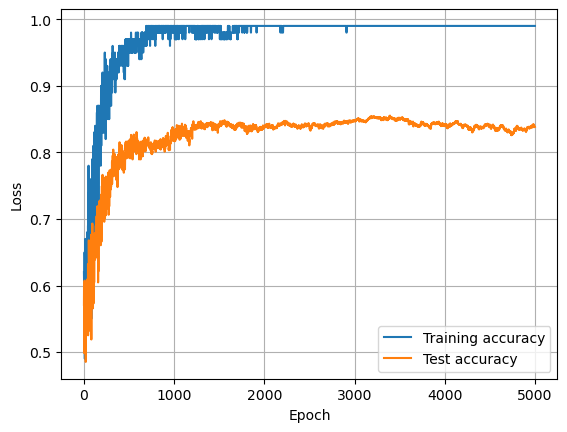

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x_lin = np.linspace(0,epochs-1,epochs)
"""
plt.plot(x_lin,accuracy_graph[:,0,0,0])
plt.plot(x_lin,accuracy_graph[:,1,0,0])
plt.plot(x_lin,accuracy_graph[:,2,0,0])
plt.plot(x_lin,accuracy_graph[:,3,0,0])
plt.plot(x_lin,accuracy_graph[:,4,0,0])
"""

#plt.plot(x_lin,np.mean(accuracy_graph,axis=1)[:,0,0])
#plt.plot(x_lin,np.mean(accuracy_graph2,axis=1)[:,0,0])

plt.plot(x_lin,np.mean(accuracy_graph3,axis=1)[:,0,0],label=r'Training accuracy')
plt.plot(x_lin,np.mean(accuracy_graph4,axis=1)[:,0,0],label=r'Test accuracy')

#plt.plot(x_lin,np.mean(loss_graph_train,axis=1)[:,0,0],label=r'Train loss')
#plt.plot(x_lin,np.mean(loss_graph_test,axis=1)[:,0,0],label=r'Test loss')

#plt.plot(x_lin,np.mean(loss_graph,axis=1)[:,0,0])
plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
#plt.savefig('NeuralNetworkFigures/Loss_NN_first_order.eps', format='eps')    
plt.show()

In [16]:
points = 300
x_lin = np.linspace(-1.1, 1.1, num=points)
y_lin = np.linspace(-1.1, 1.1, num=points)

span = np.zeros((2,points**2))
tar = np.zeros((points**2))

for i in range(points):   
    x = x_lin[i]
    for j in range(points):
        ind = i*points + j
        y = y_lin[j]
        span[:,ind] = np.array([x,y])

for i in range(points**2):
    test = model.forward2(span[:,i])
    tar[i] = test[0]
    

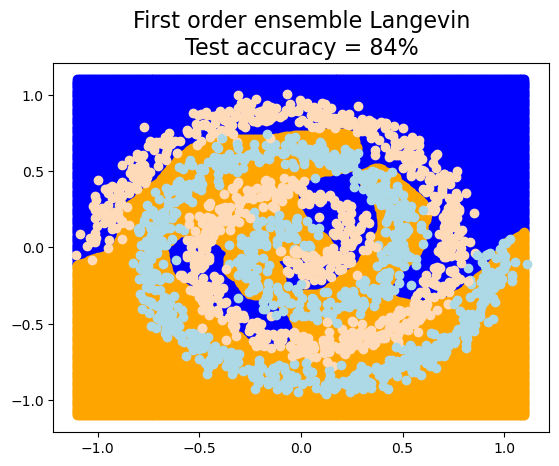

In [21]:
import numpy as np
import matplotlib.pyplot as plt

tar_boolean = (tar >= 0.5)
plt.plot(span[0,tar_boolean], span[1,tar_boolean],'o', c = 'b') #'#FF0000''b'
plt.plot(span[0,~tar_boolean], span[1,~tar_boolean],'o', c = 'orange')#'#0000FF''orange'
#plt.plot(x2, y2,'o',color="red")  # Add label to each plot

for features, target in TestDataSet:
    if target == 0:
        plt.scatter(features[0], features[1], c='#ADD8E6', label='Class 0',zorder=10)#'#ADD8E6'
    else:
        plt.scatter(features[0], features[1], c = '#FFDAB9', label='Class 1',zorder=10)#'#FFDAB9'

plt.title(f'First order ensemble Langevin\nTest accuracy = {84}%',fontsize=16)
plt.savefig('NeuralNetworkFigures/First_Order_NN_Test_Overlay.eps', format='eps')    
plt.show()

In [20]:
accuracy_graph4[-1]

array([[[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842105]],

       [[0.83842

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(x, y,'o',label=r'Class 0')  # Add label to each plot
plt.plot(x2, y2,'o',color="red",label=r'Class 1')  # Add label to each plot

plt.title(r'Swiss roll dataset',fontsize=16)
#plt.grid(True)
plt.legend()
plt.savefig('Swiss_roll.eps', format='eps')    
plt.show()

### Testing Neural Network

In [331]:
l = len(TestDataSet)
total_loss = 0
correct = 0

for X,y in TestDataSet:
    pred = model.forward(X)
    loss = LossFunction(pred, y)
    total_loss += loss
    if (y == 1):
        correct +=(pred>=0.5)*1
    else:
        correct += (pred<0.5)*1
    

accuracy = correct/l


In [360]:
l2

1900

In [350]:
1/(1+iteration*10)

9.999000099990002e-05

## Second order Neural network

In [18]:
class network:
    def __init__(self, input_size,hidden_size,output_size,N):
        
        #h_shared_values = np.random.uniform(-1,1,(1,input_size,hidden_size))
        h_shared_values = np.random.normal(scale = np.sqrt(2/input_size),size=(1,input_size,hidden_size))
        
        
        h_shared_vector = np.repeat(h_shared_values, N, axis=0)

        h_pertubation = np.random.normal(scale = 1,size = (N,1))*1 #? Don't know 
        
        h_pertubation_one_array = np.ones((N,input_size,hidden_size))
        h_pertubation_array = h_pertubation_one_array*h_pertubation[:,np.newaxis]
        h = h_shared_vector + h_pertubation_array 
        

        #o_shared_values = np.random.uniform(-5,5,(1,hidden_size,output_size))
        o_shared_values = np.random.uniform(-1/np.sqrt(hidden_size),1/np.sqrt(hidden_size),(1,hidden_size,output_size))
        #o_shared_values = np.random.normal(scale = np.sqrt(2/hidden_size),size=(1,hidden_size,output_size))
        o_shared_vector = np.repeat(o_shared_values, N, axis=0)

        o_pertubation = np.random.normal(scale = 1,size=(N,1))*1 #? Don't know the size here
        o_pertubation_one_array = np.ones((N,hidden_size,output_size))
        o_pertubation_array = o_pertubation_one_array*o_pertubation[:,np.newaxis]
        o = o_shared_vector + o_pertubation_array 
        
        v_h = h
        v_o = o
        
        self.v_h = v_h
        self.v_o = v_o
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.hidden2 = h
        self.output2 = o
        
        self.N = N
        self.hidden = h
        self.output = o

        
    def relu(self,x):
        return np.maximum(0, x)
    
    def sigmoid(self,x):
        #sig = np.exp(x)/(np.exp(x)+1)
        sig = 1/(1+np.exp(-x))
        #clamped_sig = np.clip(sig, -20, 20)
        return sig

    def forward(self,input):
        firstLayer = np.matmul(input[np.newaxis,:], self.hidden)
        Relu = self.relu(firstLayer)
        SecondLayer = Relu@self.output
        clamped_SecondLayer = np.clip(SecondLayer, -10, 10)
        Sigmoid = self.sigmoid(clamped_SecondLayer)
        return Sigmoid
    
    def forward2(self,input):
        firstLayer = np.matmul(input[np.newaxis,:], self.hidden2)
        Relu = self.relu(firstLayer)
        SecondLayer = Relu@self.output2
        clamped_SecondLayer = np.clip(SecondLayer, -10, 10)
        Sigmoid = self.sigmoid(clamped_SecondLayer)
        return Sigmoid
    
    def forward_v(self,input):
        firstLayer = np.matmul(input[np.newaxis,:], self.v_h)
        Relu = self.relu(firstLayer)
        SecondLayer = Relu@self.v_o
        clamped_SecondLayer = np.clip(SecondLayer, -10, 10)
        Sigmoid = self.sigmoid(clamped_SecondLayer)
        return Sigmoid
    
    def testing(self,h,o):
        self.hidden2 = h
        self.output2 = o
       
    """
    def testing(self):
        self.v_h = self.hidden
        self.v_o = self.output
    """
    def update(self,o_update,h_update,iteration,h_var):#,o_noise,h_noise,iteration):
        
        input_size = self.input_size
        output_size = self.output_size
        hidden_size = self.hidden_size
        N = self.N
        
        v_h = self.v_h 
        v_o = self.v_o
        
        h0 = 0.0001#0.0000001
        epsilon = 10**(-8)
        h_var2 = h0/(h_var+epsilon) 
        lambdaa = 0.7
        
        #Hidden update
        hidden = v_h - h_var2*h_update
        self.v_h = hidden + lambdaa*(hidden-self.hidden) + np.random.normal(scale = np.sqrt(2/input_size),size = (N,input_size,hidden_size))*10**(-2)#*h_var2#*10**(-2)#np.random.normal(scale = 1,size = (N,input_size,hidden_size))*np.sqrt(h_var2)
        self.hidden = hidden
        
        #Output update
        output = v_o - h_var2*o_update
        self.v_o = output + lambdaa*(output-self.output) + np.random.normal(scale = np.sqrt(2/hidden_size),size = (N,hidden_size,output_size))*10**(-2)#*h_var2#*10**(-2)  #+np.random.uniform(-1/np.sqrt(hidden_size)*h_var2,1/np.sqrt(hidden_size),(N,hidden_size,output_size))#+ np.random.normal(scale = 1,size = (N,hidden_size,output_size))*np.sqrt(h_var2)
        self.output = output
        
        #np.random.normal(scale = 1,size=(N,hidden_size,output_size))*np.sqrt(h_p)
    
    
original_model = network(2,100,1,50)
#model = network(2,3,1,3)



In [19]:
import copy
model = copy.deepcopy(original_model)
n = model.N
l = len(TrainDataSet)
l2 = len(TestDataSet)
epochs = 1000


loss_graph = np.zeros((epochs,n,1,1)) 
accuracy_graph = np.zeros((epochs,n,1,1)) 
accuracy_graph2 = np.zeros((epochs,n,1,1)) 
accuracy_graph3 = np.zeros((epochs,n,1,1)) 

iteration = 0
for epoch in range(epochs):


    h = model.hidden
    o = model.output
    v_h = model.v_h
    v_o = model.v_o

    o_total_update = 0
    h_total_update = 0

    correct = 0
    correct2 = 0
    total_loss = 0
    iteration += 1


    #elapsed_time4 = 0
    count_var = 0
    for X,y in TrainDataSet:
    # Compute prediction error
        #start_time = time.time()
        pred = model.forward_v(X)

        #Variable h
        pred2 = model.forward(X)
        fbar2 = np.sum(pred2)/n
        const2 = (pred2-fbar2)
        h_temp = np.sum(const2,axis=0)/n
        lossfunc3 = -(pred2-y)/(pred2*(pred2-1)+10**(-8))
        lossfunc4 = np.clip(lossfunc3, -20, 20)
        h_var = np.sum(h_temp*lossfunc4)



        #Loss and Accuracy for plots
        loss = LossFunction(pred, y)
        total_loss += loss
        if (y == 1):
            correct +=(pred>=0.5)*1
        else:
            correct += (pred<0.5)*1


        fbar = np.sum(pred)/n #Be carful regarding multiple inputs at the same time
        lossfunc2 = -(pred-y)/(pred*(pred-1)+10**(-8))
        lossfunc = np.clip(lossfunc2, -20, 20)
        const = (pred-fbar)


        #Change in output weights
        o_new = const*v_o        
        o_update_temp = np.sum(o_new,axis=0)/n
        o_update = o_update_temp*lossfunc
        o_total_update += o_update



        #Change in input weights
        h_new = const*v_h
        h_update_temp = np.sum(h_new,axis=0)/n
        h_update = h_update_temp*lossfunc
        h_total_update += h_update

        count_var += 1
        if count_var == 2:
            count_var = 0
            h_total_update = h_total_update/2
            o_total_update = o_total_update/2
            model.update(o_total_update,h_total_update,iteration,h_var)
            o_total_update = 0
            h_total_update = 0


    """
    for X,y in TestDataSet:
        pred = model.forward(X)
        if (y == 1):
            correct2 +=(pred>=0.5)*1
        else:
            correct2 += (pred<0.5)*1
    """

    h_total_update = h_total_update/l
    o_total_update = o_total_update/l

    #Used for plots
    total_loss = total_loss/l
    accuracy = correct/l
    #accuracy2 = correct2/l2
    accuracy_graph[epoch,:,:,:] = accuracy
    #accuracy_graph2[epoch,:,:,:] = accuracy2
    loss_graph[epoch,:,:,:] = total_loss
    
    
    h_a = np.sum(np.exp(-20*total_loss))
    h_b = np.sum(h*np.exp(-20*total_loss),axis=0)
    h_c=h_b/h_a

    o_a = np.sum(np.exp(-20*total_loss))
    o_b = np.sum(o*np.exp(-20*total_loss),axis=0)
    o_c=o_b/o_a

    o_c_new_axis = o_c[np.newaxis,:]
    o2 = np.repeat(o_c_new_axis, n, axis=0)

    h_c_new_axis = h_c[np.newaxis,:]
    h2 = np.repeat(h_c_new_axis, n, axis=0)
    
    model.testing(h2,o2)
    
    correct3 = 0
    for X,y in TrainDataSet:
        pred = model.forward2(X)
        if (y == 1):
            correct3 +=(pred>=0.5)*1
        else:
            correct3 += (pred<0.5)*1
            
    accuracy3 = correct3/l
    accuracy_graph3[epoch,:,:,:] = accuracy3

    #Update model parameters
    #model.update(o_total_update,h_total_update,iteration,h_var)#,o_noise_total,h_noise_total,iteration)



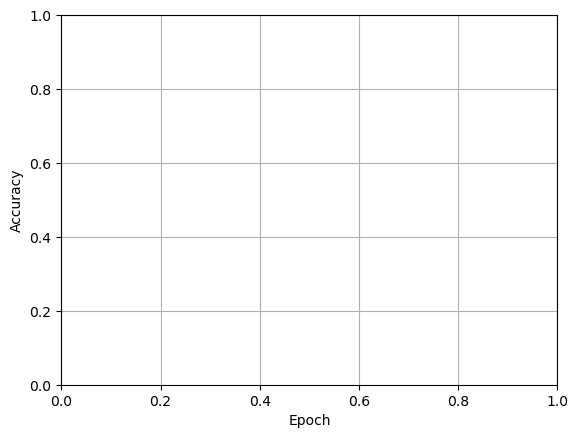

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x_lin = np.linspace(0,epochs-1,epochs)
"""
plt.plot(x_lin,accuracy_graph[:,0,0,0])
plt.plot(x_lin,accuracy_graph[:,1,0,0])
plt.plot(x_lin,accuracy_graph[:,2,0,0])
plt.plot(x_lin,accuracy_graph[:,3,0,0])
"""
#plt.plot(x_lin,accuracy_graph[:,4,0,0])

#plt.plot(x_lin,np.mean(accuracy_graph,axis=1)[:,0,0])
#plt.plot(x_lin,np.mean(accuracy_graph3,axis=1)[:,0,0])
#plt.plot(x_lin,np.mean(accuracy_graph2,axis=1)[:,0,0])

#plt.plot(x_lin,np.mean(loss_graph,axis=1)[:,0,0])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()